**This notebook analyses possible correlations between hateful speech on 4chan and socioeconomic factors in the USA**

In [609]:
import numpy as np
import pandas as pd
from sklearn import linear_model
import os
import matplotlib.pyplot as plt

import all counts into one dataframe

In [610]:
counts_path = "./Counts"
counts_files = ["./Counts/" + p for p in filter(lambda x: ".csv" in x, os.listdir(counts_path))]

In [611]:
df = None
for f in counts_files:
    if df is None:
        df = pd.read_csv(f, index_col=0)
    else:
        df = df.append(pd.read_csv(f, index_col=0))

In [612]:
df.head()

,timestamp,content,matched_vocab,0,hate_count
52270200,1.577401e+09,judge halt unconstitutional poll tax in north ...,NaN,NaN,NaN
52270201,1.577401e+09,522702north carolina democratic attorney gener...,NaN,NaN,NaN
52270202,1.577401e+09,522702get fucked with your incendiary title th...,NaN,NaN,NaN
52270203,1.577401e+09,522737i am easily triggered over thread title ...,NaN,NaN,NaN
52270204,1.577401e+09,522703while opponent say they suppress voting ...,NaN,NaN,NaN


define hate_count column as number of hateful words

In [613]:
def countWords(text):
    try:
        return len(text.split(" "))
    except Exception:
        return 0

In [614]:
df.loc[:,"hate_count"] = df.loc[:,"matched_vocab"].map(countWords)

In [615]:
count_max = df.loc[:,"hate_count"].max()
df.loc[df.loc[:,"hate_count"] == count_max]

,timestamp,content,matched_vocab,0,hate_count
7328845207,1.462631e+09,southern european wop dago wog greaseball germ...,ape chink coon dago gook greaseball groids hun...,NaN,19


convert timestamp to date and month

In [616]:
df.loc[:,'date'] = pd.to_datetime(df.loc[:,"timestamp"], unit='s')

In [617]:
df.loc[:,'month'] = pd.to_datetime(df.loc[:,"date"]).dt.to_period('M')

In [618]:
df.head()

,timestamp,content,matched_vocab,0,hate_count,date,month
52270200,1.577401e+09,judge halt unconstitutional poll tax in north ...,NaN,NaN,0,2019-12-26 23:00:00,2019-12
52270201,1.577401e+09,522702north carolina democratic attorney gener...,NaN,NaN,0,2019-12-26 23:00:00,2019-12
52270202,1.577401e+09,522702get fucked with your incendiary title th...,NaN,NaN,0,2019-12-26 23:00:00,2019-12
52270203,1.577401e+09,522737i am easily triggered over thread title ...,NaN,NaN,0,2019-12-26 23:00:00,2019-12
52270204,1.577401e+09,522703while opponent say they suppress voting ...,NaN,NaN,0,2019-12-26 23:00:00,2019-12


group by month and calculate sum of hate_count

In [619]:
hate_share_monthly = df.groupby("month").sum()["hate_count"] / df.groupby("month")["content"].count()

In [620]:
hate_share_monthly.head()

month
2010-05    0.062108
2010-06    0.061812
2010-07    0.079445
2010-08    0.067873
2010-09    0.079233
Freq: M, dtype: float64

export for later use

In [621]:
hate_share_monthly.to_csv("./Counts/hate_share_monthly.csv")

transform to index with base value 100

In [622]:
hate_share_monthly = 100 * (hate_share_monthly / hate_share_monthly.iloc[0])

In [623]:
hate_share_monthly.head()

month
2010-05    100.000000
2010-06     99.524053
2010-07    127.914978
2010-08    109.283369
2010-09    127.574280
Freq: M, dtype: float64

<AxesSubplot:xlabel='month'>

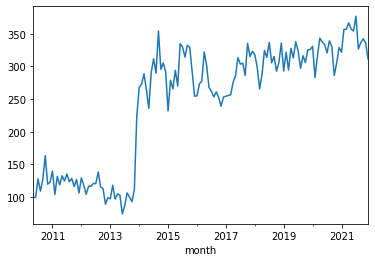

In [624]:
hate_share_monthly.plot.line()

etract relative change of counts over month

In [625]:
hate_share_monthly_change = hate_share_monthly.pct_change().dropna() * 100

In [626]:
hate_share_monthly_change.head()

month
2010-06    -0.475947
2010-07    28.526697
2010-08   -14.565620
2010-09    16.737140
2010-10    28.324719
Freq: M, dtype: float64

<AxesSubplot:xlabel='month'>

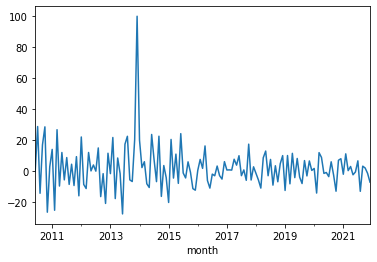

In [627]:
hate_share_monthly_change.plot.line()

Look at monthly change in usa hourly wages

In [628]:
us_hourly_wages_change = pd.read_csv("./usa_indicators/usa_hourly_earnings_monthly_change.csv", index_col=0)

In [629]:
us_hourly_wages_change.head()

,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
Year,,,,,,,,,,,,
2010,0.05,0.04,0.00,0.04,0.04,0.00,0.06,0.03,0.05,0.07,-0.01,0.03
2011,0.09,0.02,0.00,0.05,0.07,0.02,0.09,-0.03,0.04,0.09,-0.02,0.03
2012,0.03,0.03,0.09,0.03,0.00,0.07,0.05,-0.02,0.08,-0.01,0.07,0.10
2013,0.03,0.01,0.04,0.06,0.02,0.08,0.01,0.05,0.03,0.03,0.07,0.01
2014,0.04,0.11,-0.01,0.03,0.06,0.05,0.03,0.08,0.00,0.02,0.07,0.00


drop first five months of 2010

In [630]:
us_hourly_wages_change.iloc[0,0:5] = pd.NA

In [631]:
us_hourly_wages_change.head()

,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
Year,,,,,,,,,,,,
2010,<NA>,<NA>,<NA>,<NA>,<NA>,0.00,0.06,0.03,0.05,0.07,-0.01,0.03
2011,0.09,0.02,0.0,0.05,0.07,0.02,0.09,-0.03,0.04,0.09,-0.02,0.03
2012,0.03,0.03,0.09,0.03,0.0,0.07,0.05,-0.02,0.08,-0.01,0.07,0.10
2013,0.03,0.01,0.04,0.06,0.02,0.08,0.01,0.05,0.03,0.03,0.07,0.01
2014,0.04,0.11,-0.01,0.03,0.06,0.05,0.03,0.08,0.00,0.02,0.07,0.00


transform to series

In [632]:
a = us_hourly_wages_change.iloc[0]
a.index = [f"{us_hourly_wages_change.index[0]}-{i}" for i in range(1,13)]
for i in range(1,len(us_hourly_wages_change.index)):
    b = us_hourly_wages_change.iloc[i]
    b.index = [f"{us_hourly_wages_change.index[i]}-{x}" for x in range(1,13)]
    a = a.append(b)
us_hourly_wages_change = a.dropna().map(np.float64) * 100
us_hourly_wages_change.head()

2010-6     0.0
2010-7     6.0
2010-8     3.0
2010-9     5.0
2010-10    7.0
dtype: float64

In [633]:
us_hourly_wages_change.index = hate_share_monthly_change.index

<AxesSubplot:xlabel='month'>

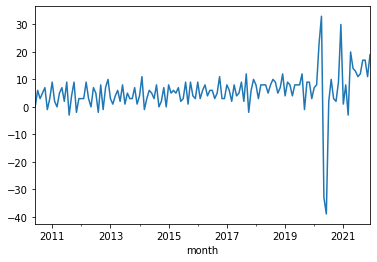

In [634]:
us_hourly_wages_change.plot.line()

drop last 22 months

In [635]:
hate_share_monthly_change_pre_covid = hate_share_monthly_change.iloc[:-22]
us_hourly_wages_change_pre_covid = us_hourly_wages_change.iloc[:-22]

perform simple regression

In [636]:
reg = linear_model.LinearRegression()
reg.fit(us_hourly_wages_change.iloc[:].to_numpy().reshape(-1,1), hate_share_monthly_change.iloc[:].to_numpy())
reg.coef_

array([-0.01889646])

In [637]:
reg.fit(us_hourly_wages_change_pre_covid.iloc[:].to_numpy().reshape(-1,1), hate_share_monthly_change_pre_covid.iloc[:].to_numpy())
reg.coef_

array([-0.61374512])

For a shift of two periods a sligthly negative correlation can be found between change in wages and hate speech

look at change in unemployment

In [638]:
us_unemployment_change = pd.read_csv("./usa_indicators/usa_unemployment_monthly_change.csv", index_col=0)
us_unemployment_change.iloc[0,0:5] = pd.NA
a = us_unemployment_change.iloc[0]
a.index = [f"{us_unemployment_change.index[0]}-{i}" for i in range(1,13)]
for i in range(1,len(us_unemployment_change.index)):
    b = us_unemployment_change.iloc[i]
    b.index = [f"{us_unemployment_change.index[i]}-{x}" for x in range(1,13)]
    a = a.append(b)
us_unemployment_change = a.dropna().map(np.float64) * 100
us_unemployment_change.head()

2010-6    -20.0
2010-7      0.0
2010-8     10.0
2010-9      0.0
2010-10   -10.0
dtype: float64

In [639]:
us_unemployment_change.index = hate_share_monthly_change.index

<AxesSubplot:xlabel='month'>

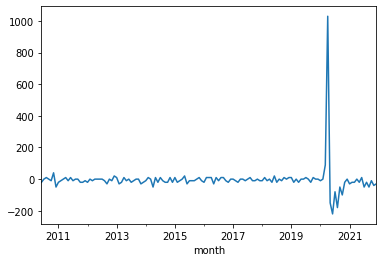

In [640]:
us_unemployment_change.plot.line()

<AxesSubplot:xlabel='month'>

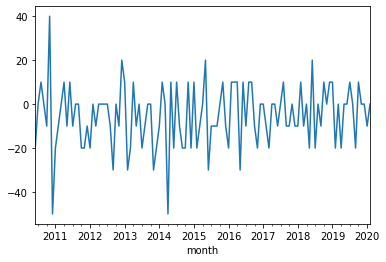

In [641]:
us_unemployment_change_pre_covid = us_unemployment_change.iloc[:-22]
us_unemployment_change_pre_covid.plot.line()

In [642]:
reg.fit(us_unemployment_change_pre_covid.iloc[:-4].to_numpy().reshape(-1,1), hate_share_monthly_change_pre_covid.iloc[4:].to_numpy())
reg.coef_

array([0.08338549])

look at combined regression

In [643]:
us_combined = pd.DataFrame(columns=["hourly_wages_change", "unemployment_change"], index=hate_share_monthly_change.index)
us_combined.loc[:,'hourly_wages_change'] = us_hourly_wages_change
us_combined.loc[:,"unemployment_change"] = us_unemployment_change

In [644]:
us_combined.tail()

,hourly_wages_change,unemployment_change
month,,
2021-08,12.0,-20.0
2021-09,17.0,-50.0
2021-10,17.0,-10.0
2021-11,11.0,-40.0
2021-12,19.0,-30.0


In [645]:
reg.fit(us_combined.iloc[:-2].to_numpy(), hate_share_monthly_change.iloc[2:].to_numpy())
reg.coef_

array([-0.13421784,  0.00447009])

In [646]:
us_combined_pre_covid = us_combined.iloc[:-22]

In [647]:
reg.fit(us_combined_pre_covid.iloc[:-2].to_numpy(), hate_share_monthly_change_pre_covid.iloc[2:].to_numpy())
reg.coef_

array([-0.48835706,  0.03759857])

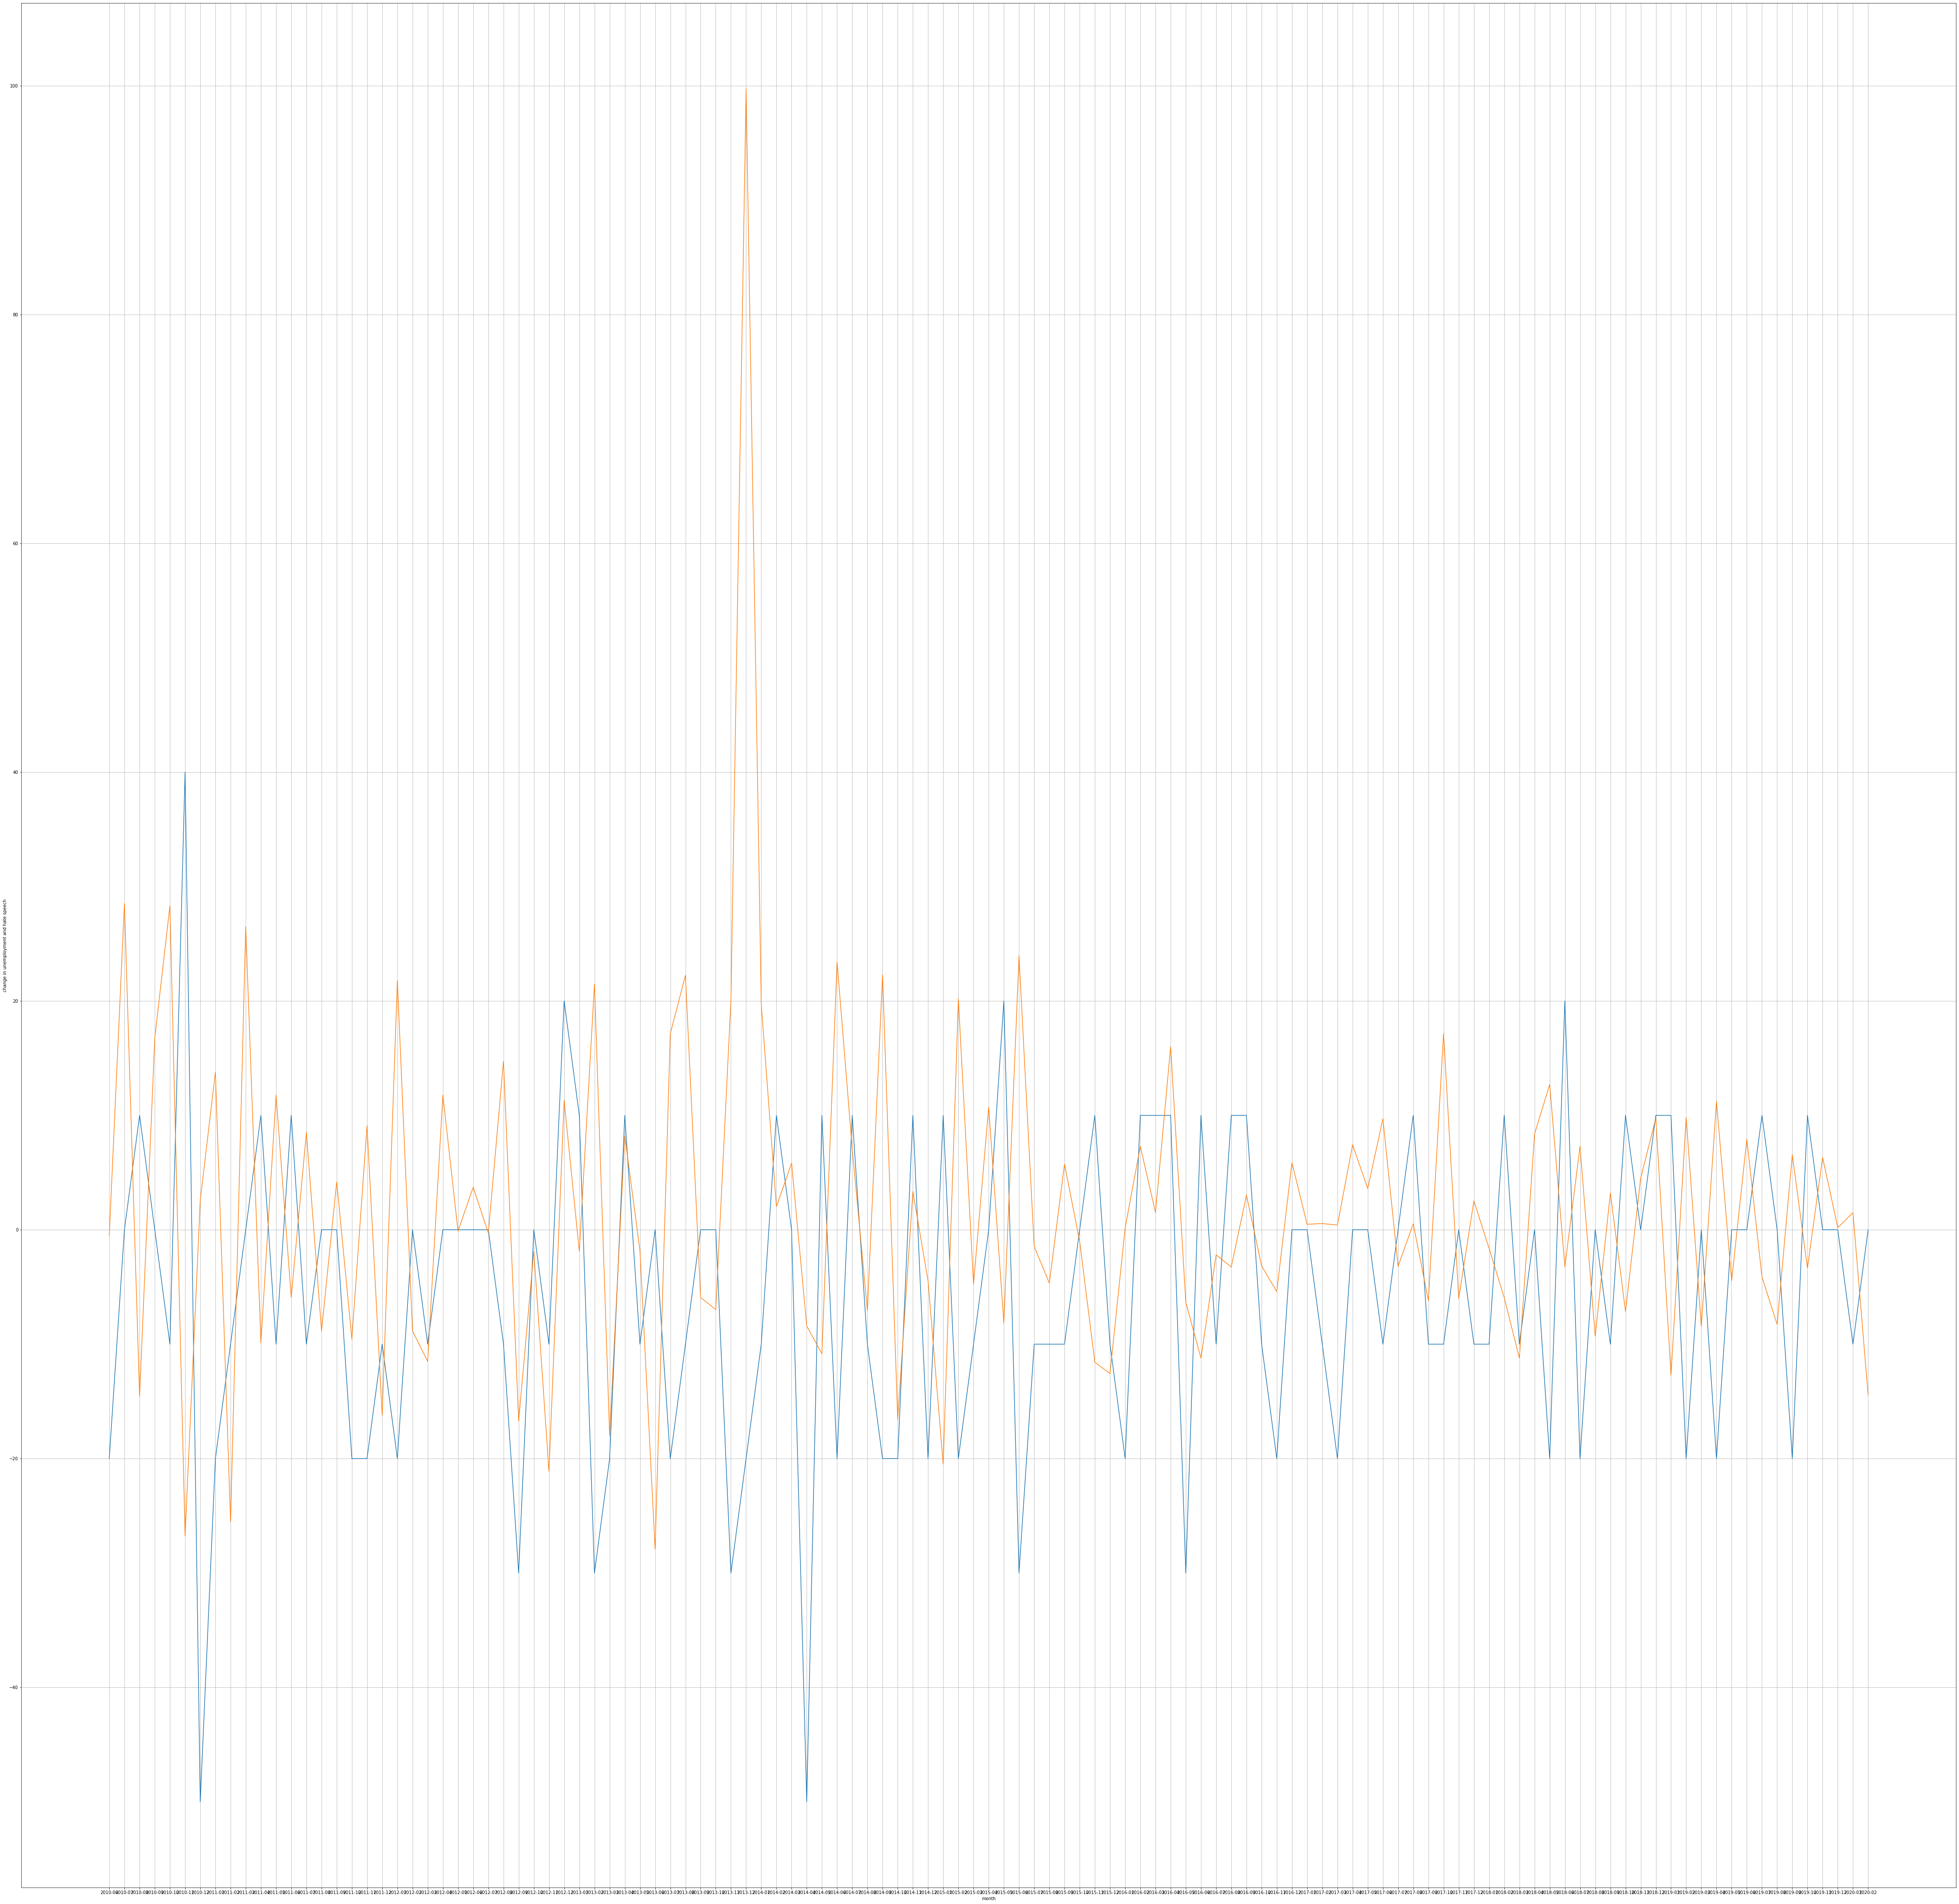

In [666]:
fig, axs = plt.subplots(1, 1, figsize=(80,80))
t = list(map(str,us_combined_pre_covid.index))
s1 = us_combined_pre_covid.loc[:,"hourly_wages_change"]
s2 = us_combined_pre_covid.loc[:,"unemployment_change"]
s3 = hate_share_monthly_change_pre_covid
plt.plot(t, s2, t, s3)
#axs[0].set_xlim(0, 2)
axs.set_xlabel('month')
axs.set_ylabel('change in unemployment and hate speech')
axs.grid(True)
plt.show()
fig.savefig("./Figures/change_unemployment_and_hate_speech.png", format="png")